For project 8, we will plot proportional plots.

In [1]:
import pandas as pd
c=pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
c.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


Now as this a very big data we will focus on the dataset of united states. As a result we will filter out all other data

In [2]:
#Time series plot for USA
dat_USA = c[c['iso_code']=="USA"]
dat_USA.shape
dat_USA.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
74954,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
74955,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
74956,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
74957,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
74958,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


In [3]:
dat_USA.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [4]:
#We will convert date to index for variations with time
dat_USA['date'] = pd.to_datetime(dat_USA['date'], utc=True)
dat_USA_index = dat_USA.set_index('date')
dat_USA_index.head()

C:\Users\shams\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22 00:00:00+00:00,USA,North America,United States,1.0,NaN,NaN,NaN,NaN,NaN,0.003,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2020-01-23 00:00:00+00:00,USA,North America,United States,1.0,0.0,NaN,NaN,NaN,NaN,0.003,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2020-01-24 00:00:00+00:00,USA,North America,United States,2.0,1.0,NaN,NaN,NaN,NaN,0.006,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2020-01-25 00:00:00+00:00,USA,North America,United States,2.0,0.0,NaN,NaN,NaN,NaN,0.006,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2020-01-26 00:00:00+00:00,USA,North America,United States,5.0,3.0,NaN,NaN,NaN,NaN,0.015,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


From the Pie chart we can see that patients with cardiovasc death rate is the highest, followed by smokers which indicates
that the more vulnerable lun gs is the more probability of being affected by Covid.

Now we will plot the distribution plot.

In [5]:
dat_USA_index['total_deaths'].resample('A').sum()

date
2020-12-31 00:00:00+00:00    46921310.0
2021-12-31 00:00:00+00:00    43784455.0
Freq: A-DEC, Name: total_deaths, dtype: float64

Interestingly from the pie chart we can see that in 2021 there have been a huge amount of death just within four months,
obvious enough that 2020 total death cases is more. 

C:\Users\shams\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shams\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\shams\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\shams\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\shams\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  k

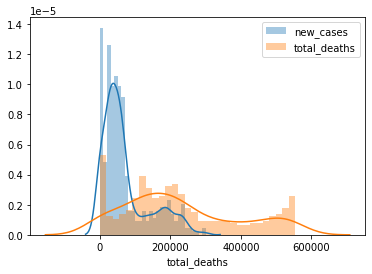

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.distplot(dat_USA_index['new_cases'], bins=30, label='new_cases')
sns.distplot(dat_USA_index['total_deaths'], bins=30, label='total_deaths')
plt.legend()

Here I plotted the distribution plot between new cases and total deaths. We can see the association between this two
variables. Both the curves shows to bimodal indicating that there were two waves of covid death and cases.

C:\Users\shams\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


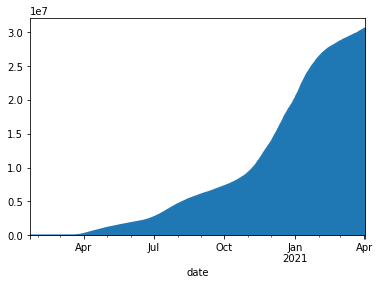

In [9]:
dat_USA_index['total_cases'].plot(kind='area')

C:\Users\shams\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shams\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shams\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.co

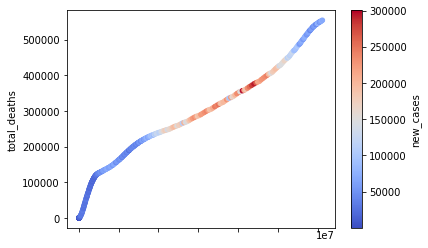

In [11]:
dat_USA_index.plot.scatter(x='total_cases', y='total_deaths', c='new_cases', cmap='coolwarm')

In this association plot we can see correlation between total death and new cases. Also the reddish points indicate
new cases. So as total cases increased we can also see total deaths kept increasing, and there were new cases were 
active in the midst of total cases. 

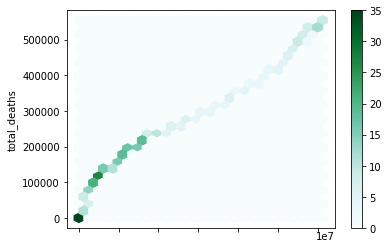

In [12]:
dat_USA_index.plot.hexbin(x='total_cases', y='total_deaths', gridsize=25)

From this association plot we can see that the death rate were dense during initial covid cases. 

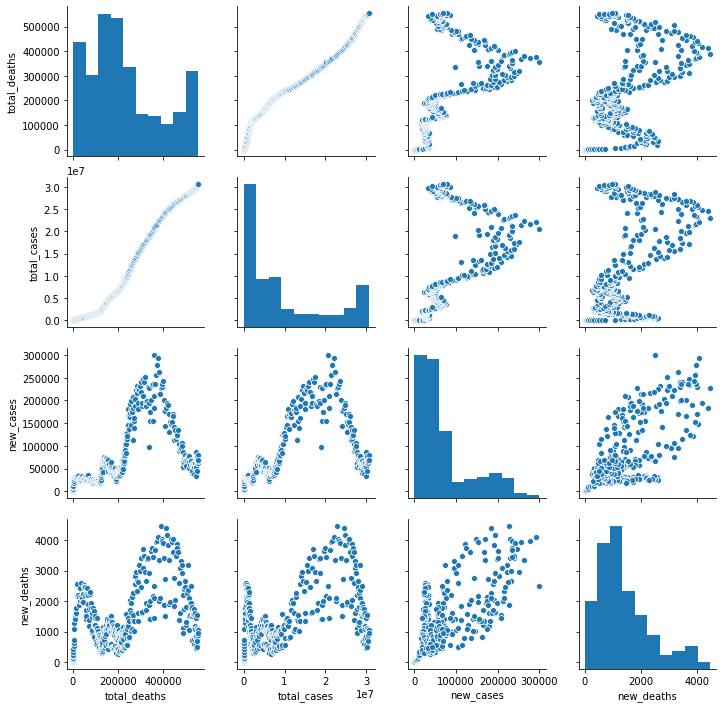

In [15]:
sns.pairplot(dat_USA_index[['total_deaths','total_cases','new_cases', 'new_deaths']])

I plotted the association plot for various variables. In this pair plot we can easily define the correlation between
each pair of plots. 